## Retail and Wholesale Sales

In [1]:
import sys
import os
import pandas as pd
import numpy as np


# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates

# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

### Getting the data

In [2]:
payload = {
    "type": "data_table",
    "operation": "yoy_growth_rel",
    "language": "es",
    "group_by": [
        "economic_activity",
        "geography"
    ],
    "categories": {
        "economic_activity": [
            "169c33ccdd66d77",
            "23cf92d98dd7c11"
        ],
        "geography": "all"
    },
    "request": [
        {
            "table": "mex_inegi_emec",
            "variables": [
                "bec9a157efff972"
            ]
        }
    ],
    "from": "2010-01-25"
}

response = get_tukan_api_request(payload)

Success getting the data


In [3]:
data = response["data"]

### State Maps

In [4]:
data_states = data[data["geography__ref"] != "b815762a2c6a283"].copy()

In [5]:
import geopandas as gpd

In [6]:
# Read maps

# df_mun = gpd.read_file("../../../assets/maps/00mun.shp")
df_edo = gpd.read_file("../../../assets/maps/00ent.shp")

#INEGI - TUKAN geography mapping

inegi_tukan_map = pd.read_csv('../../../assets/maps/inegi_geography_map.csv', dtype={'CVEGEO':'str'})

# And we apply the mapping to the shapefile

df_edo = pd.merge(df_edo, inegi_tukan_map[['CVEGEO', 'CVEGEO_tukan']], how = 'left', on = 'CVEGEO')
# df_edo = pd.merge(df_edo, inegi_tukan_map[['CVEGEO', 'CVEGEO_tukan']], how = 'left', on = 'CVEGEO')

#Rename columns
df_edo.rename(columns = {'CVEGEO_tukan':'geography__ref'}, inplace = True)
# df_edo.rename(columns = {'CVEGEO_tukan':'geography__ref'}, inplace = True)

In [7]:
data_states = data_states[data_states["date"] == data_states["date"].max()].copy()

In [8]:
data_states = pd.merge(df_edo, data_states, how = "left", on = "geography__ref").reset_index(drop = True)

In [9]:
data_wholesale = data_states[data_states["economic_activity__ref"] == "169c33ccdd66d77"]
data_retail = data_states[data_states["economic_activity__ref"] != "169c33ccdd66d77"]

In [10]:
data_retail.reset_index(drop = True, inplace = True)
data_wholesale.reset_index(drop = True, inplace = True)

In [11]:
data_retail.sort_values(by = "bec9a157efff972", ascending = True).tail(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,geography__ref,date,economic_activity__ref,economic_activity,geography,bec9a157efff972
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",360a302c378e710,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Baja California Sur,0.127317
7,08,08,Chihuahua,"POLYGON ((1961978.327 2201082.365, 1961978.967...",df4199cdf95d9a2,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Chihuahua,0.136937
6,07,07,Chiapas,"POLYGON ((3560747.319 695090.732, 3561146.749 ...",41898e9ee8eca2e,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Chiapas,0.156408
31,32,32,Zacatecas,"POLYGON ((2515182.307 1441549.749, 2515937.734...",737125369fa1d94,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Zacatecas,0.169902
22,23,23,Quintana Roo,"MULTIPOLYGON (((4039086.131 787620.709, 403895...",ff9e50f58bb1ce3,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Quintana Roo,0.174485


In [12]:
data_wholesale.sort_values(by = "bec9a157efff972", ascending = True).tail(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,geography__ref,date,economic_activity__ref,economic_activity,geography,bec9a157efff972
24,25,25,Sinaloa,"MULTIPOLYGON (((2050677.490 1245244.569, 20506...",bb5cbe0609bca7d,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Sinaloa,0.199358
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",247c9cacf4224b6,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Baja California,0.199464
5,06,06,Colima,"MULTIPOLYGON (((1157633.318 768573.525, 115772...",1066aeadf0e6b1d,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Colima,0.204092
28,29,29,Tlaxcala,"POLYGON ((2912153.554 863641.586, 2912195.798 ...",5ec6f2e8362d8b2,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Tlaxcala,0.268803
22,23,23,Quintana Roo,"MULTIPOLYGON (((4039086.131 787620.709, 403895...",ff9e50f58bb1ce3,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Quintana Roo,0.372668


In [15]:
data_retail.sort_values(by = "bec9a157efff972", ascending = False).tail(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,geography__ref,date,economic_activity__ref,economic_activity,geography,bec9a157efff972
20,21,21,Puebla,"POLYGON ((2930806.280 987523.589, 2930857.791 ...",bd8b4a37deee845,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Puebla,0.014103
25,26,26,Sonora,"MULTIPOLYGON (((1621359.972 1783423.440, 16213...",503feee7604f872,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Sonora,0.008081
27,28,28,Tamaulipas,"POLYGON ((2724530.125 1735179.945, 2724595.848...",4f875e6e2443514,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Tamaulipas,0.006632
28,29,29,Tlaxcala,"POLYGON ((2912153.554 863641.586, 2912195.798 ...",5ec6f2e8362d8b2,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Tlaxcala,0.005141
12,13,13,Hidalgo,"POLYGON ((2862894.736 1047165.224, 2862941.878...",361653ebbec7c01,2021-11-01,23cf92d98dd7c11,Comercio al por menor,Hidalgo,-0.086021


In [16]:
data_wholesale.sort_values(by = "bec9a157efff972", ascending = False).tail(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,geography__ref,date,economic_activity__ref,economic_activity,geography,bec9a157efff972
20,21,21,Puebla,"POLYGON ((2930806.280 987523.589, 2930857.791 ...",bd8b4a37deee845,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Puebla,0.046240
16,17,17,Morelos,"POLYGON ((2808476.273 786837.161, 2808717.307 ...",75bb26080da6e48,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Morelos,0.041801
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",a11e95a3853fb69,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Aguascalientes,0.030324
31,32,32,Zacatecas,"POLYGON ((2515182.307 1441549.749, 2515937.734...",737125369fa1d94,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Zacatecas,0.019641
9,10,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.527...",db3b32c946ffd13,2021-11-01,169c33ccdd66d77,Comercio al por mayor,Durango,-0.006333


ipykernel_launcher:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
ipykernel_launcher:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


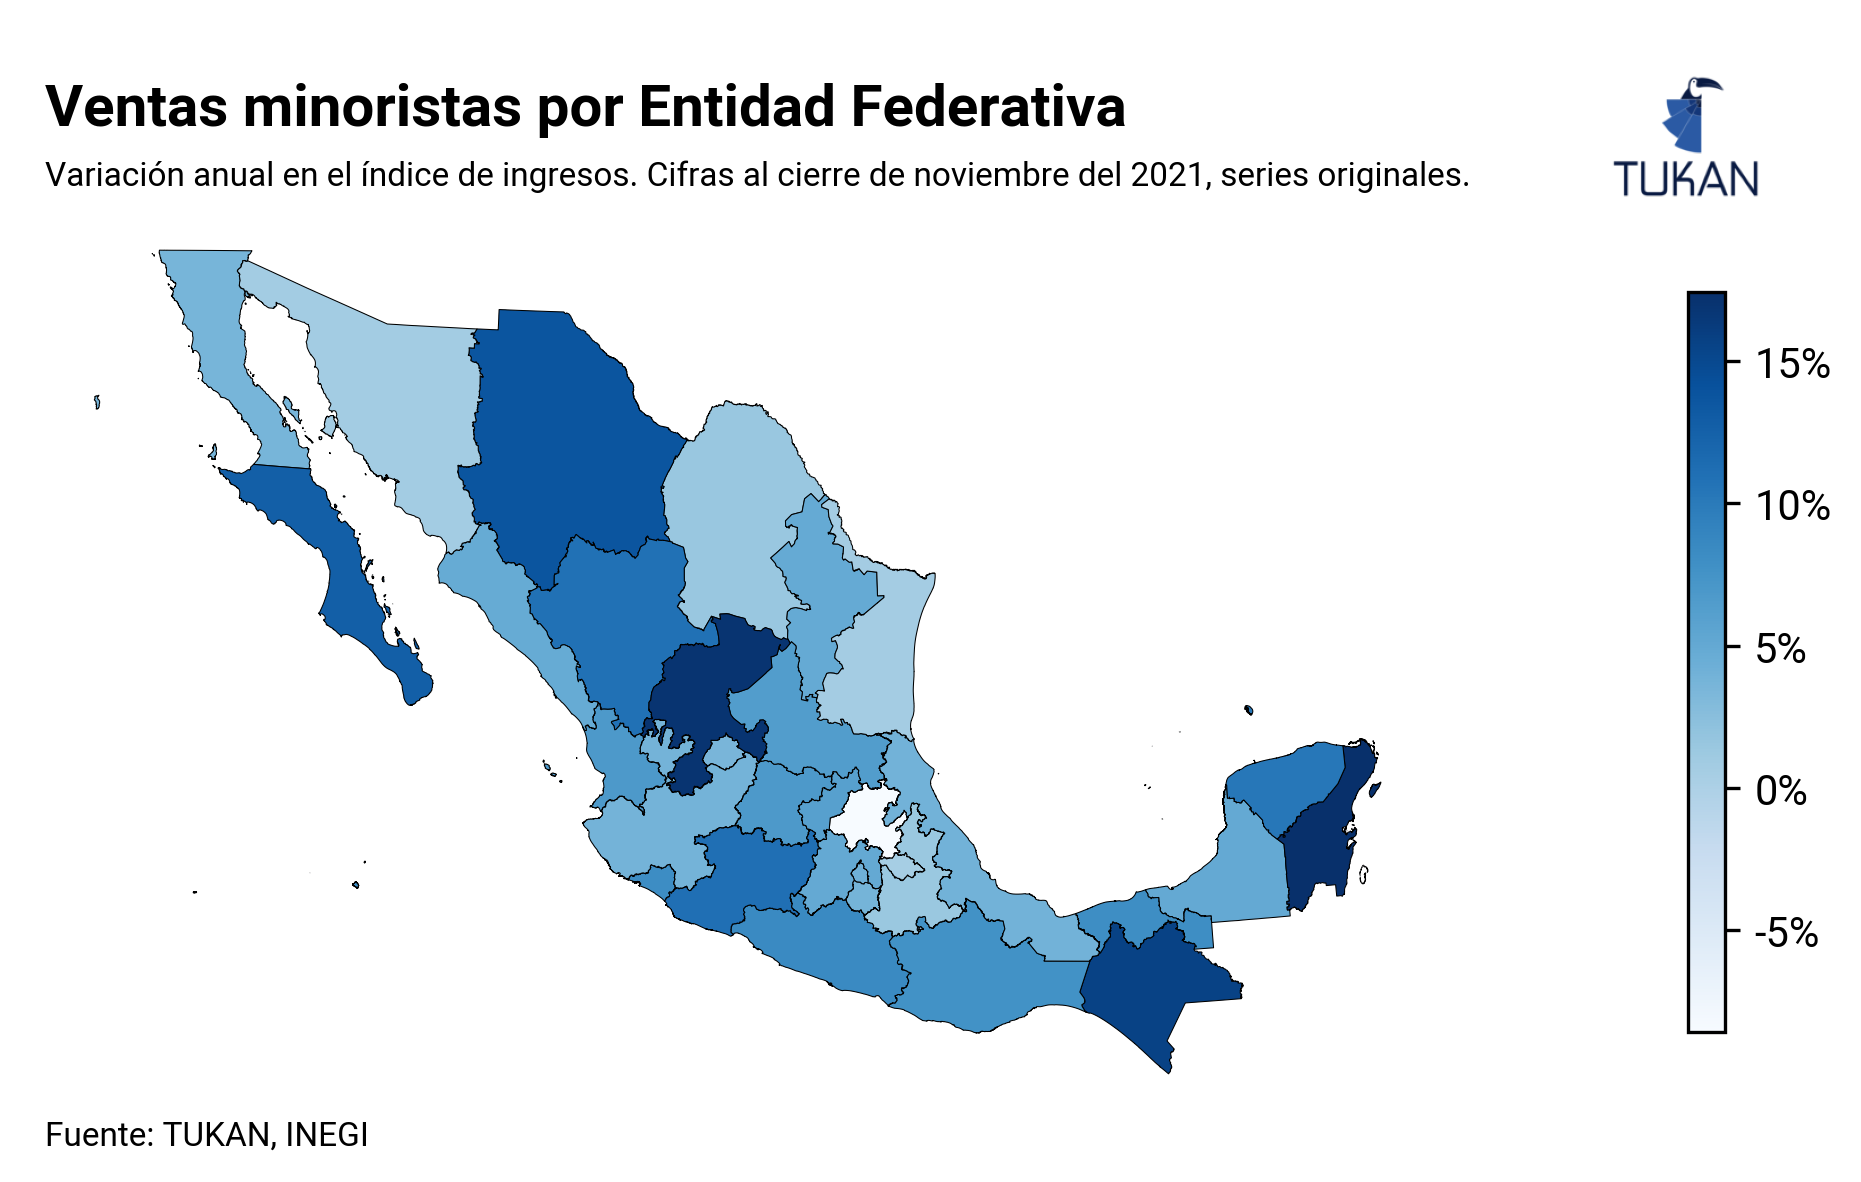

In [13]:
fig = plt.figure(figsize=(8, 4), dpi = 300)
gspec = mpl.gridspec.GridSpec(
    ncols=2, nrows=1, figure=fig, width_ratios = [.95,.05]
)

ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])


gspec.update(wspace=-0.25, hspace=0, left = 0)
ax1.axes.set_axis_off()
ax2.axes.set_axis_off()


data_retail.plot("bec9a157efff972", ax = ax1, cmap = "Blues", linewidths = 0.25, edgecolor = "black")

# --- Dummy heatmap
a = np.expand_dims(data_retail.bec9a157efff972, axis=0)
heatmap=ax2.imshow(a, cmap = "Blues")
heatmap.set_visible(False)

fig.colorbar(heatmap, fraction=0.3, pad=-1, format = ticker.StrMethodFormatter('{x:.0%}'), ax = ax2)

fig.text(
    0.2,
    .95,
    "Ventas minoristas por Entidad Federativa",
    size=14,
    weight = "bold"
)

fig.text(
    0.2,
    0.9,
    "Variación anual en el índice de ingresos. Cifras al cierre de noviembre del 2021, series originales.",
    size=8
)

# Save plot with TUKAN logo, transparent and white.

fig.text(0.2, 0.1, "Fuente: TUKAN, INEGI", fontsize=8)

plt.tight_layout()


tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.78, .85, 0.15, 0.18], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/retail_sales_map.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

ipykernel_launcher:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
ipykernel_launcher:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


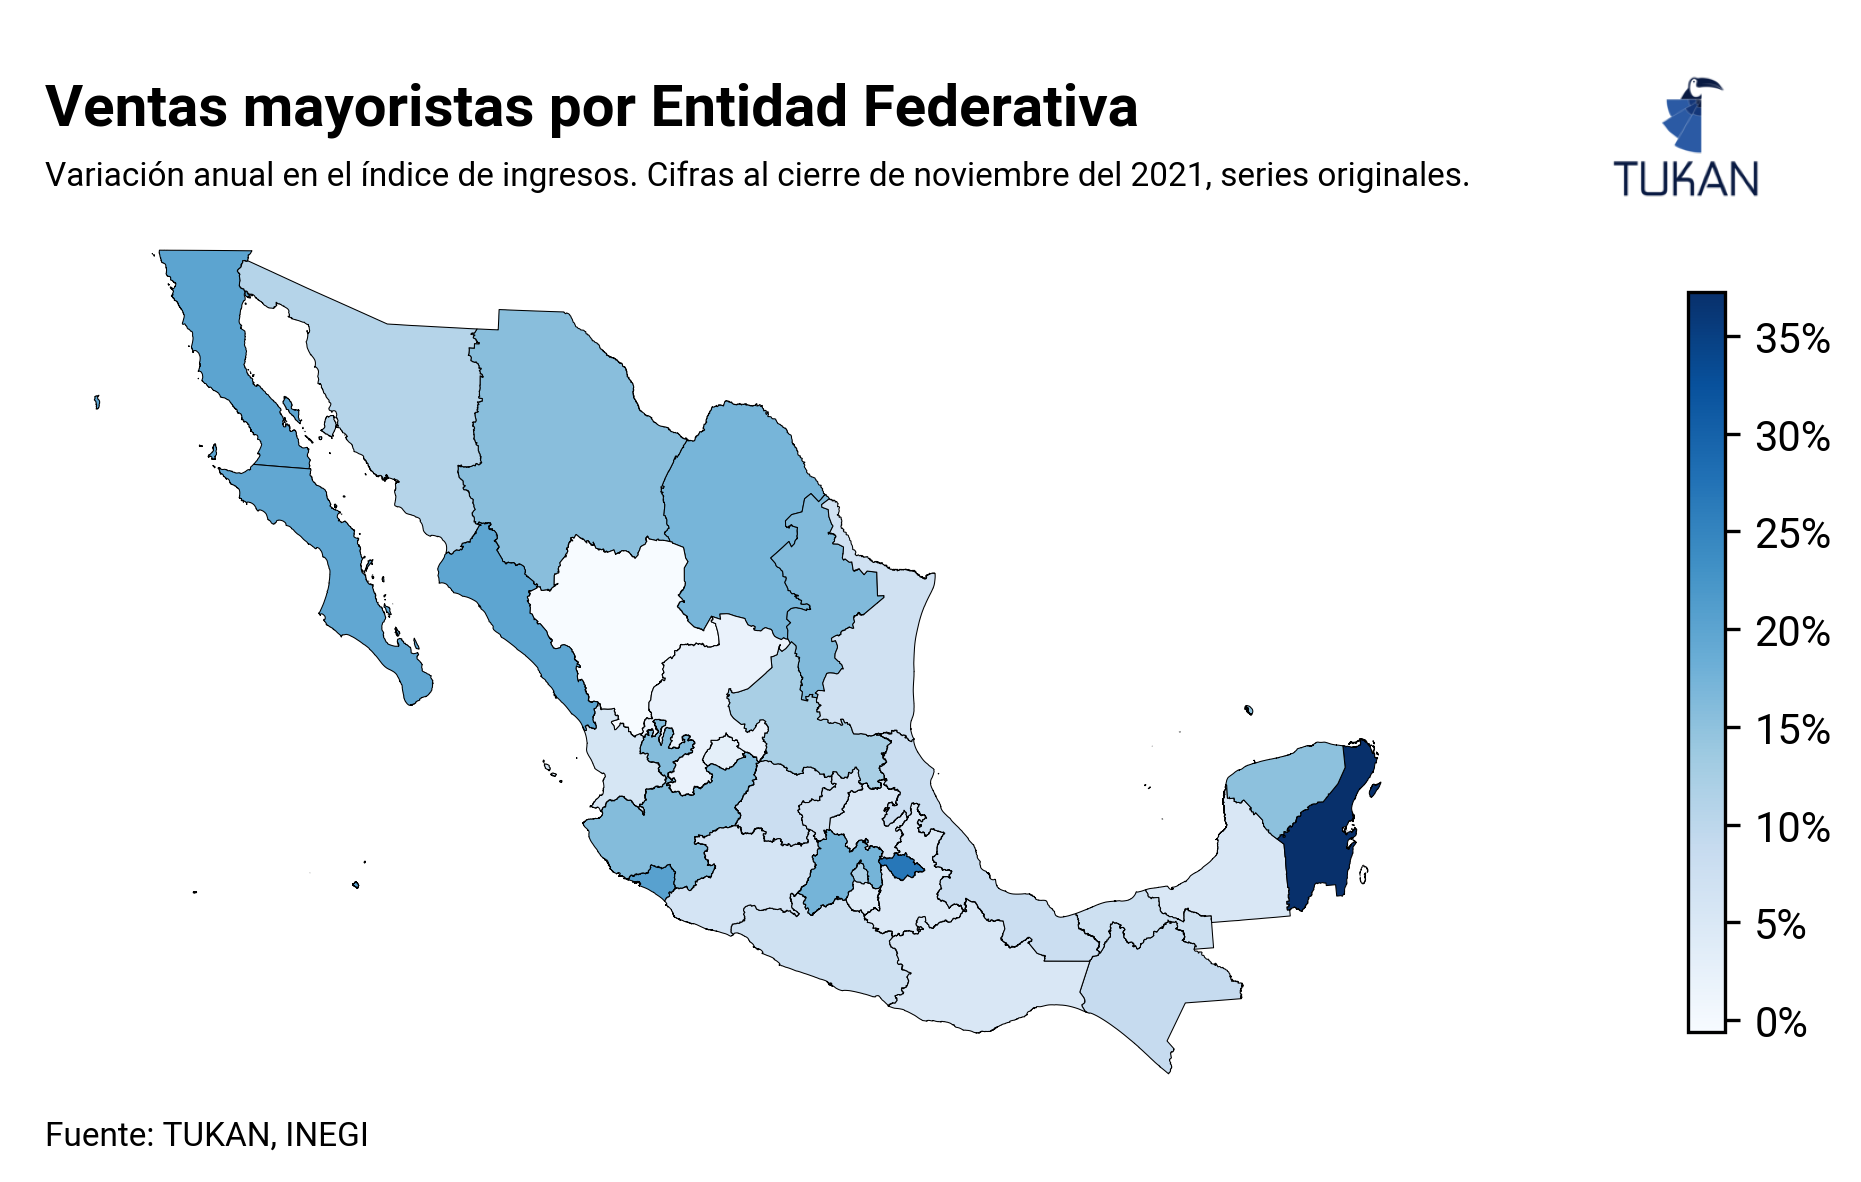

In [14]:
fig = plt.figure(figsize=(8, 4), dpi = 300)
gspec = mpl.gridspec.GridSpec(
    ncols=2, nrows=1, figure=fig, width_ratios = [.95,.05]
)

ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])


gspec.update(wspace=-0.25, hspace=0, left = 0)
ax1.axes.set_axis_off()
ax2.axes.set_axis_off()


data_wholesale.plot("bec9a157efff972", ax = ax1, cmap = "Blues", linewidths = 0.25, edgecolor = "black")

# --- Dummy heatmap
a = np.expand_dims(data_wholesale.bec9a157efff972, axis=0)
heatmap=ax2.imshow(a, cmap = "Blues")
heatmap.set_visible(False)

fig.colorbar(heatmap, fraction=0.3, pad=-1, format = ticker.StrMethodFormatter('{x:.0%}'), ax = ax2)

fig.text(
    0.2,
    .95,
    "Ventas mayoristas por Entidad Federativa",
    size=14,
    weight = "bold"
)

fig.text(
    0.2,
    0.9,
    "Variación anual en el índice de ingresos. Cifras al cierre de noviembre del 2021, series originales.",
    size=8
)

# Save plot with TUKAN logo, transparent and white.

fig.text(0.2, 0.1, "Fuente: TUKAN, INEGI", fontsize=8)

plt.tight_layout()


tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.78, .85, 0.15, 0.18], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/wholesale_sales_map.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## Mexico data

In [92]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "economic_activity",
        "geography"
    ],
    "categories": {
        "economic_activity": [
            "169c33ccdd66d77",
            "23cf92d98dd7c11"
        ],
        "geography": "all"
    },
    "request": [
        {
            "table": "mex_inegi_emec",
            "variables": [
                "bec9a157efff972"
            ]
        }
    ],
    "from": "2010-01-25"
}

response = get_tukan_api_request(payload)

Success getting the data


In [93]:
data = response["data"]

In [94]:
data_mex = data[data["geography__ref"] == "ff9e50f58bb1ce3"].copy()

In [95]:
data_mex.tail(12)

,date,economic_activity__ref,economic_activity,geography__ref,geography,bec9a157efff972
9008,2021-05-01,169c33ccdd66d77,Comercio al por mayor,ff9e50f58bb1ce3,Quintana Roo,102.798270
9041,2021-05-01,23cf92d98dd7c11,Comercio al por menor,ff9e50f58bb1ce3,Quintana Roo,140.472134
9074,2021-06-01,169c33ccdd66d77,Comercio al por mayor,ff9e50f58bb1ce3,Quintana Roo,109.751994
9107,2021-06-01,23cf92d98dd7c11,Comercio al por menor,ff9e50f58bb1ce3,Quintana Roo,135.621955
9140,2021-07-01,169c33ccdd66d77,Comercio al por mayor,ff9e50f58bb1ce3,Quintana Roo,111.815455
9173,2021-07-01,23cf92d98dd7c11,Comercio al por menor,ff9e50f58bb1ce3,Quintana Roo,145.464214
9206,2021-08-01,169c33ccdd66d77,Comercio al por mayor,ff9e50f58bb1ce3,Quintana Roo,104.883922
9239,2021-08-01,23cf92d98dd7c11,Comercio al por menor,ff9e50f58bb1ce3,Quintana Roo,144.766190
9272,2021-09-01,169c33ccdd66d77,Comercio al por mayor,ff9e50f58bb1ce3,Quintana Roo,105.028227
9305,2021-09-01,23cf92d98dd7c11,Comercio al por menor,ff9e50f58bb1ce3,Quintana Roo,133.374898


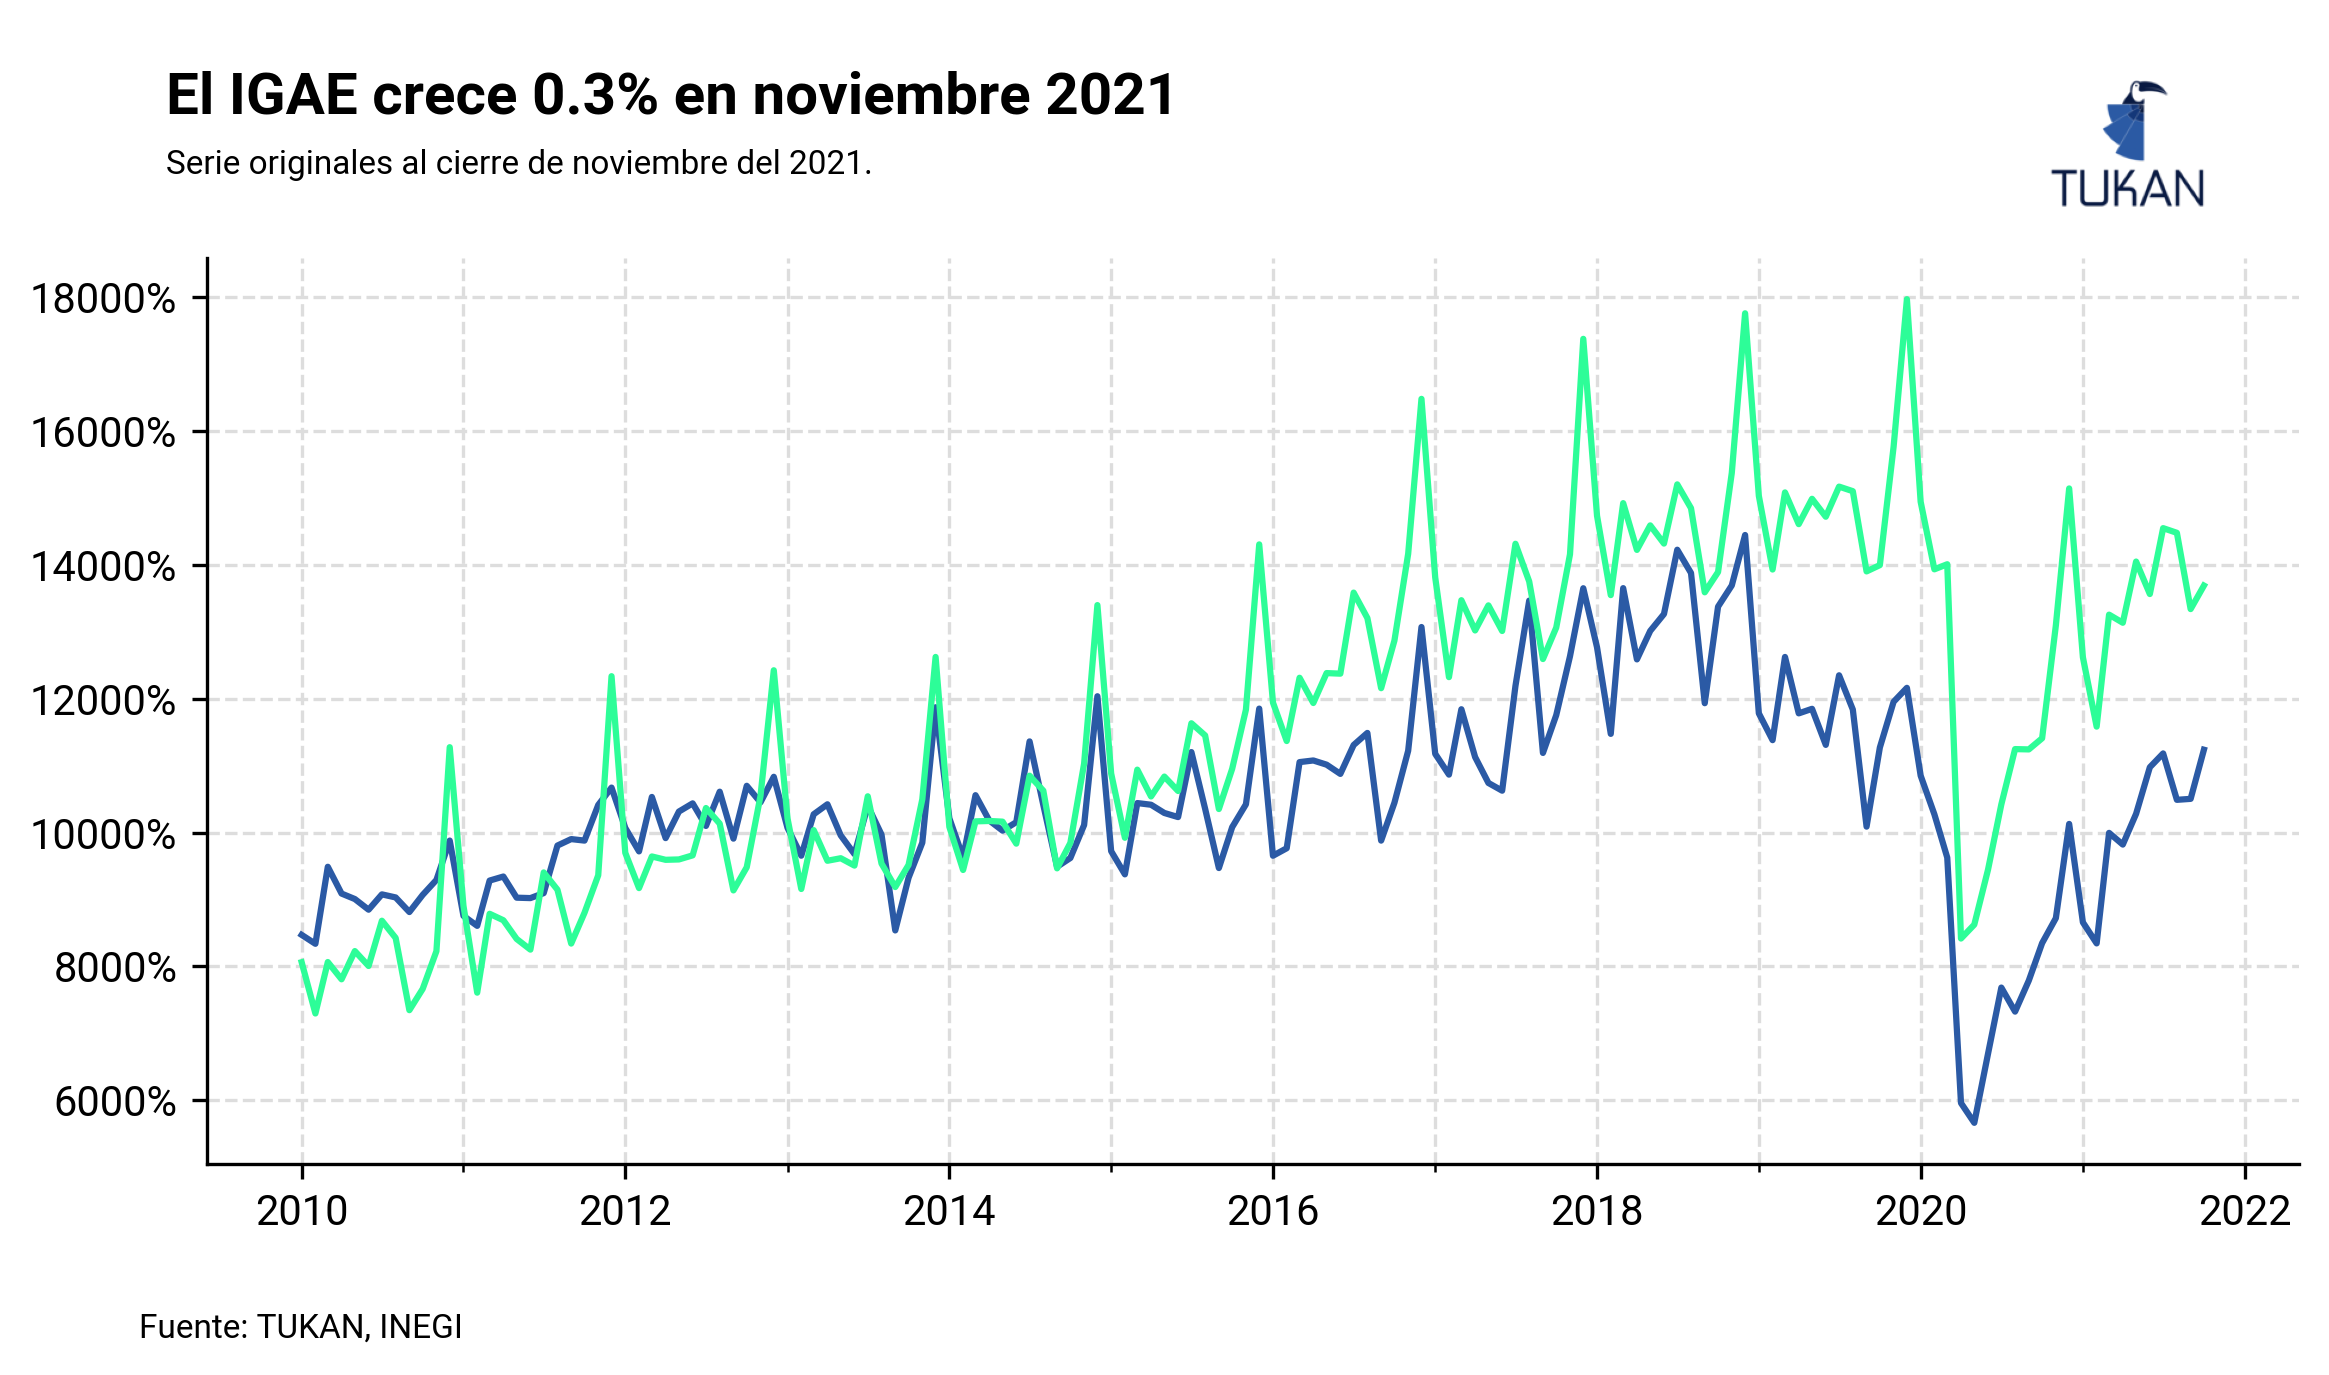

In [96]:
fig = plt.figure(dpi=300, figsize=(9,4))
ax = plt.subplot(111)

for x in data_mex["economic_activity"].unique():
    data_filtered = data_mex[data_mex["economic_activity"] == x].copy()
    # ax.hlines(y = data_filtered["bec9a157efff972"].iloc[-1], xmin = data_filtered["date"].iloc[0], xmax = data_filtered["date"].iloc[-1], color = "gray", ls = "--", linewidths = 0.75)
    ax.plot(data_filtered["date"], data_filtered["bec9a157efff972"], label = x)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0%}'))
# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='minor', linestyle='--')


# ax.set_ylim(0)

fig.text(
    0.11,
    1,
    "El IGAE crece 0.3% en noviembre 2021",
    size=14,
    weight = "bold"
)

fig.text(
    0.11,
    0.95,
    "Serie originales al cierre de noviembre del 2021.",
    size=8
)
# Add footer
fig.text(0.1, -0.02, "Fuente: TUKAN, INEGI", fontsize=8)


tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.72, .88, 0.16, 0.19], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")


plt.savefig(
    "plots/emec_ts_logo_white.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)